## Multiple Linear Regression

Now you know how to build a model with one X (independent variable) and Y (dependent variable). But what if you have three feature variables, or may be 10 or 100? By using multiple linear regression, you can build models between a dependent variable and many independent variables.

Dataset - advertising.csv

Independent variables - TV Ad Expenses, Radio Ad Expenses, Newspaper Ad Expenses

Dependent variable - Sales

In [1]:
#1 Import necessery libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#2 Import the dataset (advertising.csv) and look at the top five rows
df = pd.read_csv('tvmarketing.csv')

In [4]:
#3 Look at the bottom five rows
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [4]:
#4 Check the shape of the DataFrame (rows, columns)
df.shape

(200, 2)

In [5]:
#5 Look at the data types of the columns
df['TV'].dtype

dtype('float64')

In [6]:
#6 Look at the summary statistics
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


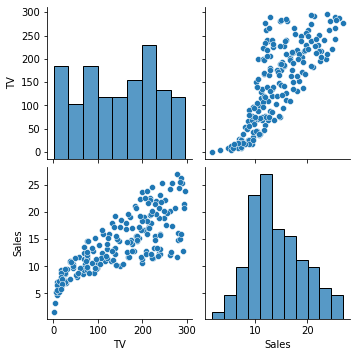

In [7]:
#7 Do a pairplot of the variables
sns.pairplot(df)
plt.show()


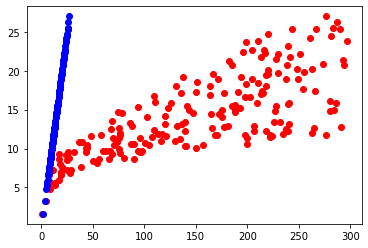

In [12]:
#8 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
plt.scatter(df.iloc[:,0], df.iloc[:,-1], color = 'red')
plt.scatter(df.iloc[:,1], df.iloc[:,-1], color = 'blue')

plt.show()

In [13]:
#9 Prepare  X (independent variables) and y (dependent variable)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [14]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [15]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
#12 Predict on the train set and calculate the error = y_pred - y_train
# Residual plot - plot y_pred in x axis and errors in y axis
y_pred = lr.predict(X_train)
error = y_pred - y_train
sns.residplot(y_pred, error)
plt.show()



ValueError: need at least one array to concatenate

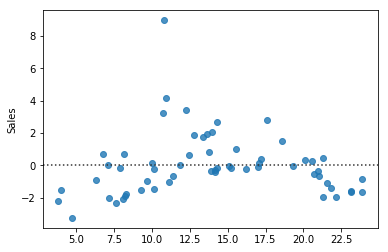

In [40]:
#13 Predic on the test set
y_pred = lr.predict(X_test)
error = y_pred - y_test
sns.residplot(y_pred, error)
plt.show()


In [45]:
#14 Print Mean Squared Error and R Squared Value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

3.867852396251159

## Backward elimination

In [14]:
#15 Build the optimal model using backward elimination








## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [4]:
#16Import the dataset (Housing.csv) and look at the top five rows
df2 = pd.read_csv('Housing.csv')

In [5]:
#17 Look at the bottom five rows
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
#18 Check the shape of the DataFrame (rows, columns)
df2.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [9]:
#19 Look at the data types of the columns
df2['price'].dtype

dtype('int64')

In [10]:
#20 Look at the summary statistics
df2.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [28]:
#21 Prepare  X (independent variables) and y (dependent variable)
X = df2.iloc[:,1:]
X
y = df2.iloc[:,0]
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
5      10850000
6      10150000
7      10150000
8       9870000
9       9800000
10      9800000
11      9681000
12      9310000
13      9240000
14      9240000
15      9100000
16      9100000
17      8960000
18      8890000
19      8855000
20      8750000
21      8680000
22      8645000
23      8645000
24      8575000
25      8540000
26      8463000
27      8400000
28      8400000
29      8400000
         ...   
515     2450000
516     2450000
517     2450000
518     2450000
519     2450000
520     2450000
521     2408000
522     2380000
523     2380000
524     2380000
525     2345000
526     2310000
527     2275000
528     2275000
529     2275000
530     2240000
531     2233000
532     2135000
533     2100000
534     2100000
535     2100000
536     1960000
537     1890000
538     1890000
539     1855000
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545

In [22]:
#22 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.iloc[:,4] = le.fit_transform(X.iloc[:,4])
X.iloc[:,5] = le.fit_transform(X.iloc[:,5])
X.iloc[:,6] = le.fit_transform(X.iloc[:,6])
X.iloc[:,7] = le.fit_transform(X.iloc[:,7])
X.iloc[:,8] = le.fit_transform(X.iloc[:,8])
X.iloc[:,10] = le.fit_transform(X.iloc[:,10])
X.iloc[:,11] = le.fit_transform(X.iloc[:,11])

In [23]:
#23 Avoiding the Dummy Variable Trap
X = X.get_dummies(X,colums=['furnishingstatus'], drop_first=True)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,232,4,2,3,1,0,0,0,1,2,1,0
1,260,4,4,4,1,0,0,0,1,3,0,0
2,268,3,2,2,1,0,1,0,0,2,1,1
3,237,4,2,2,1,0,1,0,1,3,1,0
4,232,4,1,2,1,1,1,0,1,2,0,0
5,237,3,3,1,1,0,1,0,1,2,1,1
6,256,4,3,4,1,0,0,0,1,2,1,1
7,283,5,3,2,1,0,0,0,0,0,0,2
8,249,4,1,2,1,1,1,0,1,2,1,0
9,172,3,2,4,1,1,0,0,1,1,1,2


In [24]:
#24 Look at the top 5 rows after preprocessing
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,232,4,2,3,1,0,0,0,1,2,1,0
1,260,4,4,4,1,0,0,0,1,3,0,0
2,268,3,2,2,1,0,1,0,0,2,1,1
3,237,4,2,2,1,0,1,0,1,3,1,0
4,232,4,1,2,1,1,1,0,1,2,0,0


In [27]:
#25 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

NameError: name 'y' is not defined

In [29]:
#26 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

## Backward elimination

In [1]:
#27 #15 Build the optimal model using backward elimination
import statsmodels.formula.api as smf






ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/home/laxmi/anaconda3/lib/python3.6/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.